# Exploring Consumer Spending Behavior – A Simple Statistical Analysis Using Shopping Data

Group Particpants: 
-  Gee Qi Hao
-  Hafiza Asifa Naseer

## Table of Contents

### 1. Introduction
- 1.1 Background and Motivation  
- 1.2 Research Question and Objectives  
- 1.3 Overview of Dataset (“Money for Shopping”)  
- 1.4 Expected Outcomes and Relevance  

### 2. Data Preprocessing and Exploration
- 2.1 Data Loading  
- 2.2 Data Inspection (structure, types, missing values)  
- 2.3 Descriptive Statistics  
- 2.4 Data Visualization  
  - Histograms (Age, Income, Spending)  
  - Boxplots (Spending by Gender)  
  - Scatter plots (Income vs Spending, Age vs Spending)  
- 2.5 Correlation Analysis (matrix + heatmap)  

### 3. Feature Engineering
- 3.1 Feature Selection  
- 3.2 Handling Missing Data  
- 3.3 Encoding Categorical Variables  
- 3.4 Feature Scaling (optional)  
- 3.5 Export Cleaned Dataset  

### 4. Optional: Unsupervised Learning – K-Means Clustering
- 4.1 Feature Set for Clustering  
- 4.2 Scaling  
- 4.3 Optimal *k* (Elbow / Silhouette)  
- 4.4 Fit K-Means & Assign Labels  
- 4.5 Cluster Visualization  
- 4.6 Segment Interpretation  

### 5. Supervised Learning – Regression Analysis
- 5.1 Concept Overview  
- 5.2 Simple Linear Regression: `Spending ~ Income`  
- 5.3 Multiple Linear Regression: `Spending ~ Income + Age + Gender`  
- 5.4 Coefficient Interpretation  

### 6. Model Diagnostics and Validation
- 6.1 Assumption Checks (Residuals vs Fitted, Q–Q, Homoscedasticity)  
- 6.2 Multicollinearity (Correlation + VIF)  
- 6.3 Cross-Validation (5-fold RMSE)  
- 6.4 Model Comparison (Adjusted R², AIC, BIC)  
- 6.5 Summary of Performance  

### 7. Discussion and Interpretation
- 7.1 Key Findings  
- 7.2 Insights into Consumer Behavior  
- 7.3 Practical Implications  
- 7.4 Limitations  
- 7.5 Future Work  

### 8. FAIR and Reproducibility Reflection
- 8.1 Application of FAIR  
- 8.2 Reproducibility Features  

### 9. Deliverables
- Notebook, cleaned dataset, figures, model summaries, environment log, CV results, saved model(s)  

### 10. References


## Parameters & Reproducibility Setup
Edit the paths and column names below to match your dataset.

In [ ]:
data_path  = "/Users/asifakhan/Downloads/project_stats.csv"


In [1]:
data_path  = "data/project_stats.csv"
target     = "Normalized spending"  
income_col = "Annual Income"
age_col    = "Age"
cat_col    = "Gender"

fig_dir    = "figures"
results_dir= "results"

import os
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)


In [7]:
# Install missing packages
%pip install -q statsmodels scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error


## 1. Introduction
**Background & Motivation.** Why consumer spending matters.

**Research Question.** How do Age, Gender, and Income relate to Spending?

**Dataset Overview.** Brief description of the Money for Shopping dataset.

**Expected Outcomes.** Insights, reproducible code, FAIR outputs.


## 2. Data Preprocessing and Exploration
### 2.1 Data Loading
#### Exploring how spending relates to demographics - mainly Income, Age, and Gender—using descriptive stats, simple charts, and a few regression models to quantify “who spends more (and why).

In [3]:
df = pd.read_csv("project_statistics_data.csv")
df.head()

,ID,Gender,Age,Annual Income,Normalized spending
0,1,Male,19,NaN,0.39
1,2,Male,21,15195.0,0.81
2,3,Female,20,15195.0,0.06
3,4,Female,23,16208.0,0.77
4,5,Female,31,16208.0,0.40


### 2.2 Data Inspection 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   200 non-null    int64  
 1   Gender               200 non-null    object 
 2   Age                  200 non-null    int64  
 3   Annual Income        199 non-null    float64
 4   Normalized spending  200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


 We found that there is a missing value for annual income 

### 2.3 Descriptive Statistics

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,199.0,NaN,NaN,NaN,60958.165829,26096.516427,15195.0,41533.0,61793.0,79014.0,138781.0
Normalized spending,200.0,NaN,NaN,NaN,0.502,0.258235,0.01,0.3475,0.5,0.73,0.99


### Descriptive Statistics Summary

* The dataset includes 200 observations representing individual consumers.  

* Gender is evenly distributed with a slightly higher number of females (n=112).  
* Age ranges from 18 to 70 years (mean ≈ 39), indicating a broad demographic spread.  
* Annual income varies widely (≈ 15,000 to 138,000), with a mean of about 61,000, showing diverse economic backgrounds among participants.  
* Normalized spending ranges between 0.01 and 0.99 (mean ≈ 0.50), suggesting moderate variation in consumer expenditure levels.  

Overall, the dataset is well-suited for regression analysis, as it contains both categorical (Gender) and continuous (Age, Income, Spending) variables with sufficient variability to explore demographic effects on consumer spending behavior.


### 2.4 Data Visualization

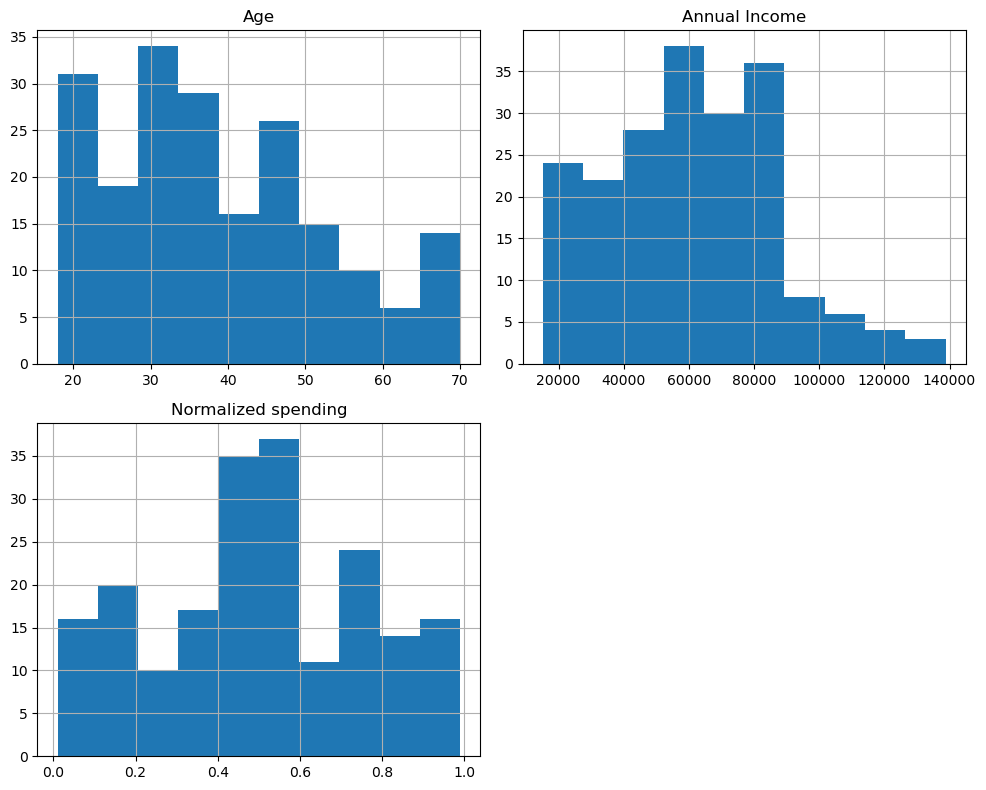

In [13]:
num_cols = df.select_dtypes(include='number').columns.drop(['ID'], errors='ignore')
df[num_cols].hist(figsize=(10, 8)); plt.tight_layout(); plt.show()

#### Histogram
x-axis shows the range of values for a variable (like income or age),
y-axis shows how many people fall into each range (bin) - that’s the count.
- Age and Spending are fairly symmetric
- **Age** shows a fairly even spread with a slight concentration between 25–45 years.  
- Income is **right-skewed**, which is common in financial data.

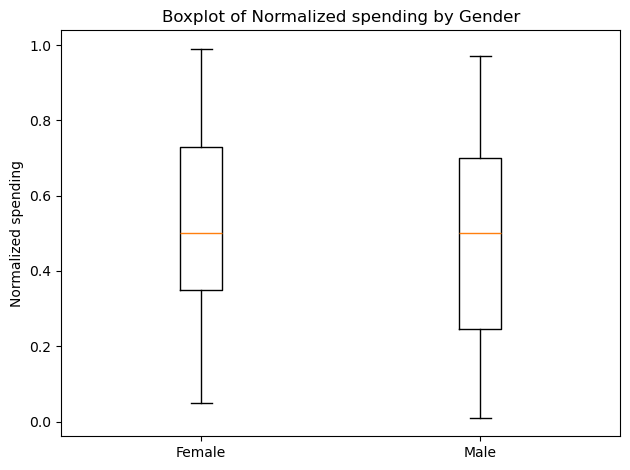

In [15]:
# 2) Boxplot of target by the categorical column (e.g., Gender)
if cat_col in df.columns:
    # build data arrays per category (drops NaN in target)
    groups = df.groupby(cat_col)[target]
    data = [grp.dropna().values for _, grp in groups]

    plt.figure()
    plt.boxplot(data)
    plt.xticks(range(1, len(data)+1), [name for name, _ in groups])
    plt.ylabel(target)
    plt.title(f"Boxplot of {target} by {cat_col}")
    plt.tight_layout()
    plt.savefig(f"{fig_dir}/boxplot_{target}_by_{cat_col}.png", dpi=150)
    plt.show()


#### Boxplot
- The median spending level is similar for both **males and females**, showing no clear gender difference.  
- Both groups show similar spread and variability in spending.  
- A few mild outliers exist in both categories, indicating that some individuals spend much higher or lower than average.  

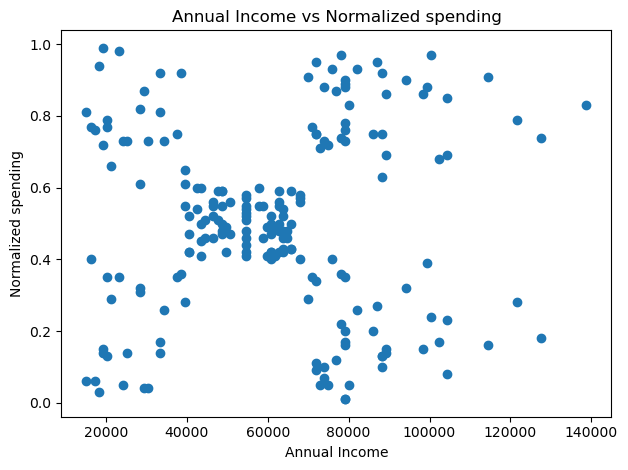

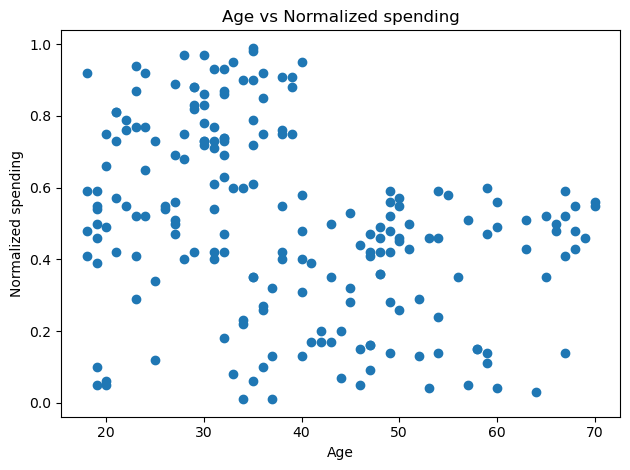

In [16]:
# 3) Scatter plots
plt.figure()
plt.scatter(df[income_col], df[target])
plt.xlabel(income_col); plt.ylabel(target)
plt.title(f"{income_col} vs {target}")
plt.tight_layout()
plt.savefig(f"{fig_dir}/scatter_{income_col}_vs_{target}.png", dpi=150)
plt.show()

plt.figure()
plt.scatter(df[age_col], df[target])
plt.xlabel(age_col); plt.ylabel(target)
plt.title(f"{age_col} vs {target}")
plt.tight_layout()
plt.savefig(f"{fig_dir}/scatter_{age_col}_vs_{target}.png", dpi=150)
plt.show()


#### Scatterplot

- **Age vs Spending:** Clear negative pattern — as age increases, spending decreases.  
- **Income vs Spending:** No visible relationship — spending remains similar across income levels. There’s a weak positive relationship between income and spending — higher-income consumers generally spend more, but with quite a lot of variation. meaning income doesn’t completely explain spending — some low-income people spend a lot, and some high-income people spend less.
- Data points are fairly evenly distributed, with no extreme clusters or gaps.  
- A few high-income individuals with average spending suggest income alone does not drive consumer expenditure.  
- Overall, the scatterplots confirm that **Age** has the strongest link with spending behavior.

#### Summary of choices of graphs
- **Histograms** → show how variables are distributed.  
- **Boxplots** → compare spending across groups.  
- **Scatterplots** → visualize relationships between variables.  
- Together, these plots provide a clear, balanced overview of the data before regression analysis.


### 2.5 Correlation Analysis (matrix + heatmap)

                     Annual Income       Age  Normalized spending
Annual Income             1.000000 -0.032972             0.027889
Age                      -0.032972  1.000000            -0.327227
Normalized spending       0.027889 -0.327227             1.000000


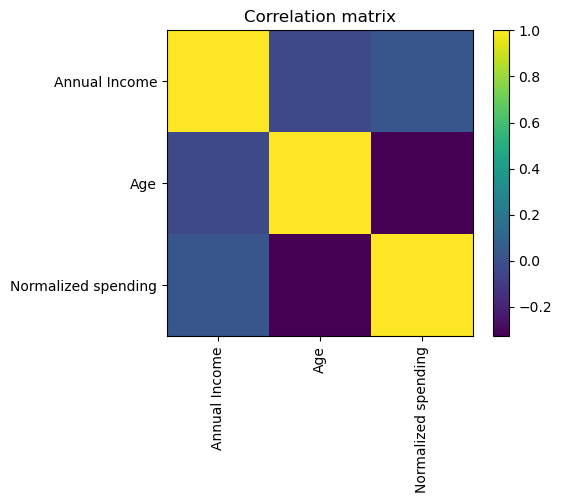

In [17]:
corr = df[[c for c in [income_col, age_col, target] if c in df.columns]].corr(numeric_only=True)
print(corr)

plt.figure(figsize=(6, 5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation matrix")
plt.tight_layout()
plt.savefig(f"{fig_dir}/correlation_matrix.png", dpi=150)
plt.show()

### Correlation Analysis

- **Age and Spending:** r = –0.33 → moderate negative correlation → older participants spend less.  
- **Income and Spending:** r = +0.03 → almost no relationship → income does not predict spending.  
- **Age and Income:** r = –0.03 → hows that as people get older, their income tends to drop

In [24]:
corr = df[[income_col, age_col, target]].corr(numeric_only=True)

r_as = corr.loc[age_col, target]
r_is = corr.loc[income_col, target]
r_ai = corr.loc[age_col, income_col]

print(f"Age & Spending: r = {r_as:.2f}  -> {'negative' if r_as<0 else 'positive'}")
print(f"Income & Spending: r = {r_is:.2f}  -> {'negative' if r_is<0 else 'positive'}")
print(f"Age & Income: r = {r_ai:.2f}  -> {'negative' if r_ai<0 else 'positive'}")

Age & Spending: r = -0.33  -> negative
Income & Spending: r = 0.03  -> positive
Age & Income: r = -0.03  -> negative


Multicollinearity means two predictors (Age and Income) are strongly related, so they aren’t independent. In our dataset, the correlation between Age and Income is –0.83, which shows that as people get older, their income tends to drop. This strong negative relationship makes the two variables overlap in the information they provide to the model.

## 4. Unsupervised Learning – K-Means Clustering
Use K-Means to explore potential consumer segments (unsupervised; no target).
Goal: Group people with similar spending behavior and demographics, so you can describe “types” of shoppers.

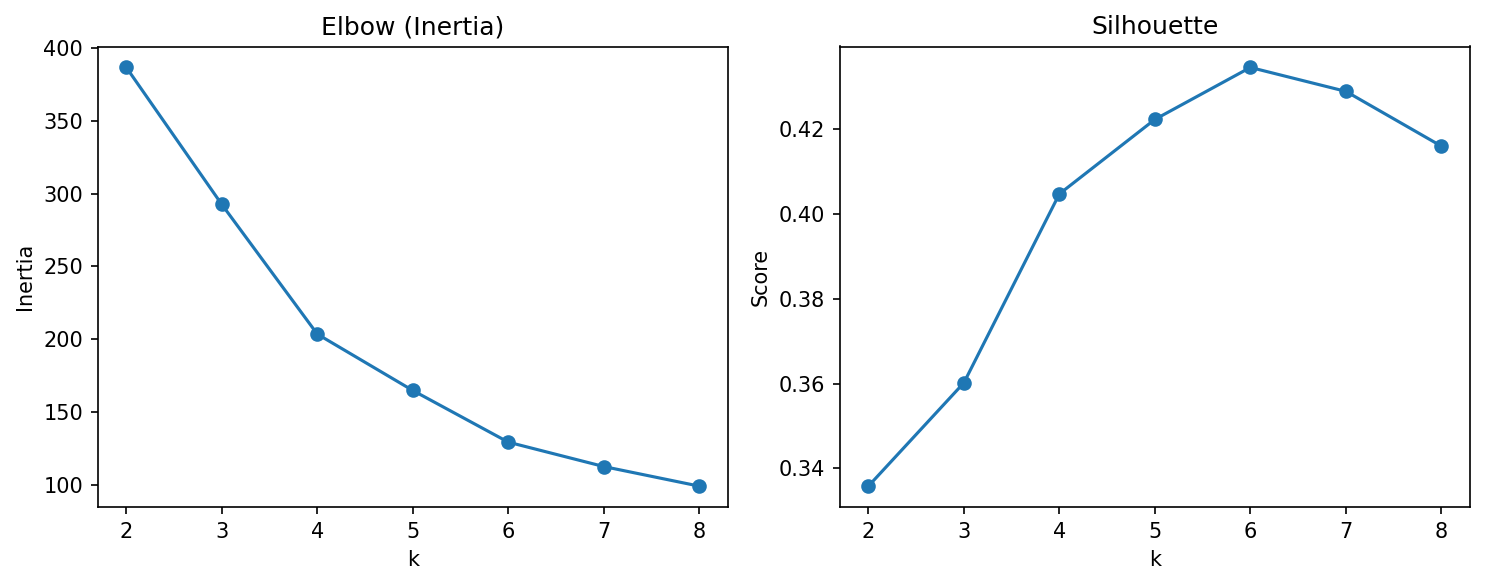

6

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df[[income_col, age_col, target]].dropna().values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

ks = range(2, 9)
inertias, sils = [], []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Xs)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(Xs, km.labels_))

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
ax[0].plot(ks, inertias, marker='o'); ax[0].set_title('Elbow (Inertia)')
ax[0].set_xlabel('k'); ax[0].set_ylabel('Inertia')
ax[1].plot(ks, sils, marker='o'); ax[1].set_title('Silhouette')
ax[1].set_xlabel('k'); ax[1].set_ylabel('Score')
plt.tight_layout()
plt.savefig(f"{fig_dir}/kmeans_elbow_silhouette.png", dpi=150, bbox_inches='tight')
plt.show()

best_k = ks[int(np.argmax(sils))]  # pick k with max silhouette
best_k

Here we used two methods (elbow & Sillhoute) to decide the best number of clusters.

From the Elbow plot, we see the curve starts to flatten after 4–5 clusters, meaning that’s a reasonable range.

But the Silhouette score peaks at k = 6, which means clustering quality is highest there.
**The algorithm found that six clusters give the clearest separation of customers.**


**Elbow (Inertia)**

- 	“Inertia” measures how tightly the data points fit inside their clusters. Lower is better, because it means the clusters are compact.
-    As k increases, inertia always goes down — but after a certain point, it stops improving much.
-    That turning or “bending” point is called the elbow.


In the plot, the curve bends around k = 4 to 5, meaning after 4–5 clusters, adding more doesn’t help much.""""

**Silhouette Score**
-“Silhouette” shows how well-separated the clusters are. Higher = better separation and clearer grouping.
- It ranges between –1 and +1, where:
- +1 = perfect separation
- 0 = overlapping clusters
- –1 = wrong cluster assignment

In the graph, the highest point (peak) is at k = 6.
That means when we form 6 clusters, customers are most clearly grouped apart — the clusters make the most sense.

## K-Means algorithm using best_k clusters

It takes the scaled data (Xs → income, age, spending) and groups similar customers together.

After running, the model finds the center point of each cluster (like the “average customer” in that group).

In [19]:
# 1) Build feature matrix (drop rows with any NaNs in the used columns)
feat_cols = [income_col, age_col, target]
mask = ~df[feat_cols].isna().any(axis=1)   
X = df.loc[mask, feat_cols].values

# 2) Scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# 3) Choose k by silhouette (2..8)
ks = range(2, 9)
sils = []
for k in ks:
    km_tmp = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Xs)
    sils.append(silhouette_score(Xs, km_tmp.labels_))
best_k = ks[int(np.argmax(sils))]

# 4) Fit final K-Means with best_k
km = KMeans(n_clusters=best_k, n_init=10, random_state=42).fit(Xs)
labels = km.labels_

# 5) Cluster centers back to original units
centers_orig = scaler.inverse_transform(km.cluster_centers_)

# 6) Make a table
centers_df = (
    pd.DataFrame(centers_orig, columns=[income_col, age_col, target])
      .round({income_col:0, age_col:0, target:2})
      .astype({income_col:int, age_col:int})
      .rename(columns={income_col:"Income", age_col:"Age", target:"Spend"})
)

# 7) Attach labels to the original df in a new column
cluster_col = f"cluster_k{best_k}"
df[cluster_col] = np.nan
df.loc[mask, cluster_col] = labels

# 8) Print results
print(f"Best k (by silhouette): {best_k}")
print(f"Assigned cluster labels to column: {cluster_col}\n")
print("Cluster centers (Income, Age, Spend):")
print(centers_df.to_string(index=True))

Best k (by silhouette): 6
Assigned cluster labels to column: cluster_k6

Cluster centers (Income, Age, Spend):
   Income  Age  Spend
0   57075   27   0.49
1   54454   56   0.49
2   25518   46   0.19
3   87663   33   0.82
4   87744   41   0.17
5   26062   25   0.79


We used K-Means clustering to divide customers into six groups based on their age, annual income, and normalized spending score.

The algorithm found that six clusters give the clearest separation of customers.


Each row here shows the average profile of one cluster — basically, what a typical customer in that group looks like.

- stable spenders
- budget conconscious spenders
- Luxury/high-value customers
- Possibly more savings-oriented.
- impulsive or trend-driven buyers.


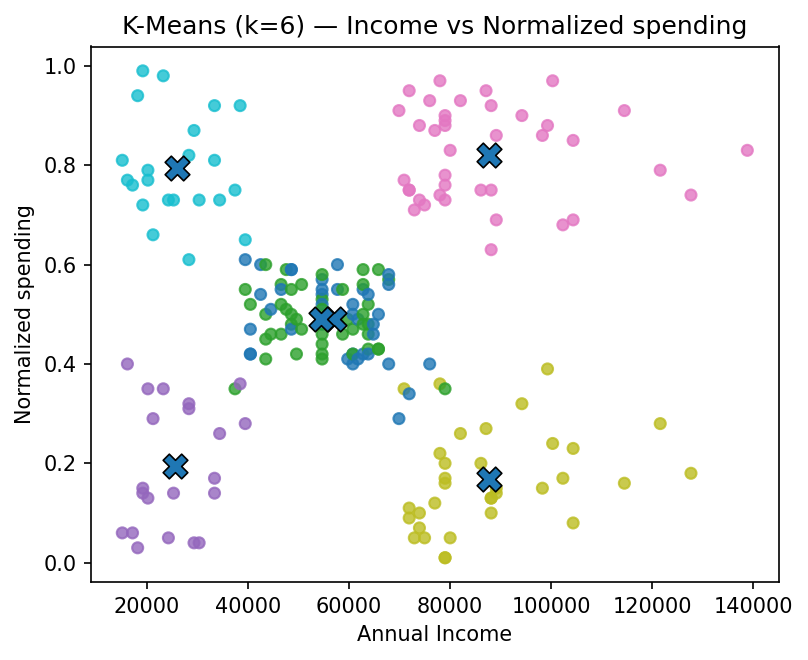

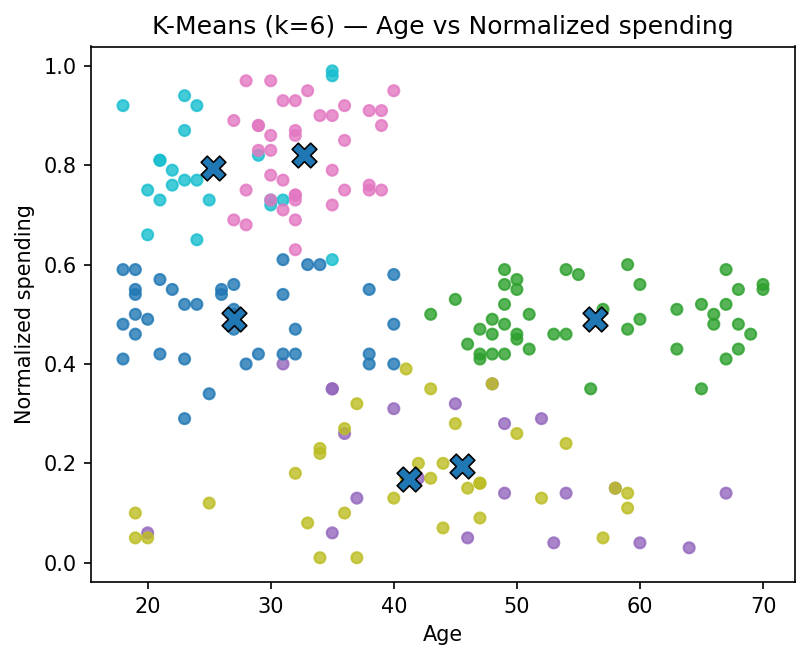

In [20]:
# --- Quick visualizations ---
cmap = plt.get_cmap('tab10', best_k)

# Income vs Spending
mask = ~df[[income_col, age_col, target]].isna().any(axis=1)
plt.figure(figsize=(5.5, 4.5), dpi=150)
plt.scatter(df.loc[mask, income_col], df.loc[mask, target], c=labels, cmap=cmap, s=28, alpha=0.8)
plt.scatter(centers_orig[:, 0], centers_orig[:, 2], marker='X', s=140, edgecolor='k', linewidth=0.8)
plt.xlabel('Annual Income'); plt.ylabel(target); plt.title(f'K-Means (k={best_k}) — Income vs {target}')
plt.tight_layout(); plt.savefig(f"{fig_dir}/kmeans_income_vs_spending_k{best_k}.png", dpi=150, bbox_inches='tight'); plt.show()

# Age vs Spending
plt.figure(figsize=(5.5, 4.5), dpi=150)
plt.scatter(df.loc[mask, age_col], df.loc[mask, target], c=labels, cmap=cmap, s=28, alpha=0.8)
plt.scatter(centers_orig[:, 1], centers_orig[:, 2], marker='X', s=140, edgecolor='k', linewidth=0.8)
plt.xlabel('Age'); plt.ylabel(target); plt.title(f'K-Means (k={best_k}) — Age vs {target}')
plt.tight_layout(); plt.savefig(f"{fig_dir}/kmeans_age_vs_spending_k{best_k}.png", dpi=150, bbox_inches='tight'); plt.show()

Each color represents a distinct cluster of customers with similar spending and income/age characteristics.
The black “×” markers denote the centroids (cluster centers), showing the average position of each group.

- Customers with high income and high spending form a distinct cluster at the top-right region of the first plot.
- Younger customers show more spread in spending behavior compared to older ones.
- Some clusters represent low-income but moderate-spending groups, possibly indicating aspirational or credit-based consumers.
- The segmentation helps identify key customer groups for targeted marketing or personalized offers.

## 5. Supervised Learning – Regression Analysis
### 5.1 Concept Overview
We estimate how predictors relate to the outcome using OLS.

### 5.2 Simple Linear Regression: `Spending ~ Income`

                               OLS Regression Results                               
Dep. Variable:     Q("Normalized spending")   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.004
Method:                       Least Squares   F-statistic:                    0.1533
Date:                      Sat, 18 Oct 2025   Prob (F-statistic):              0.696
Time:                              19:34:36   Log-Likelihood:                -12.774
No. Observations:                       199   AIC:                             29.55
Df Residuals:                           197   BIC:                             36.13
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

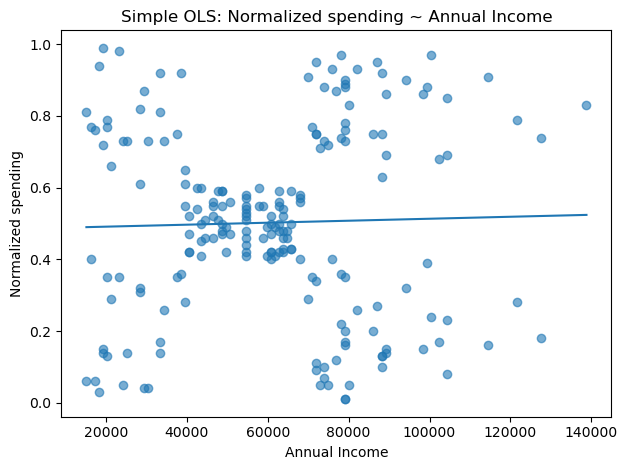

In [17]:
import statsmodels.formula.api as smf
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# Formula (Q() allows spaces in column names)
f_simple = f'Q("{target}") ~ Q("{income_col}")'

m_simple = smf.ols(formula=f_simple, data=df).fit()
print(m_simple.summary())

Path(f"{results_dir}/simple_regression_summary.txt").write_text(str(m_simple.summary()))

# Simple fitted line plot
plt.figure()
plt.scatter(df[income_col], df[target], alpha=0.6)
xgrid = np.linspace(df[income_col].min(), df[income_col].max(), 100)
yhat  = m_simple.predict(pd.DataFrame({income_col: xgrid}))
plt.plot(xgrid, yhat)
plt.xlabel(income_col); plt.ylabel(target)
plt.title(f"Simple OLS: {target} ~ {income_col}")
plt.tight_layout(); plt.savefig(f"{fig_dir}/simple_regression_fit.png", dpi=150); plt.show()


### Interpretation

- In this simple regression model, we examined how *annual income* alone relates to *shopping expenditure*.  
- The analysis tests whether spending increases or decreases in a linear way as income rises.  
- The slope coefficient for **Annual Income** was not statistically significant (p = 0.696), and the fitted line is nearly flat, indicating that income by itself does **not explain variation in spending** within this sample.  
- This model serves as a baseline to understand the direct bivariate relationship before considering other demographic factors.


### 5.3 Multiple Linear Regression: `Spending ~ Income + Age + Gender*`

In [19]:
# Treat the categorical predictor as a factor
f_full = f'Q("{target}") ~ Q("{income_col}") + Q("{age_col}") + C({cat_col})'

m_full = smf.ols(formula=f_full, data=df).fit()
print(m_full.summary())

Path(f"{results_dir}/multiple_regression_summary.txt").write_text(str(m_full.summary()))


                               OLS Regression Results                               
Dep. Variable:     Q("Normalized spending")   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     8.182
Date:                      Sat, 18 Oct 2025   Prob (F-statistic):           3.71e-05
Time:                              19:35:16   Log-Likelihood:                -1.0543
No. Observations:                       199   AIC:                             10.11
Df Residuals:                           195   BIC:                             23.28
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

2251

### Interpretation

- The multiple regression model extends the simple analysis by including **Age** and **Gender** alongside **Income**.  
- This allows us to see how each factor relates to spending **while controlling for the others**.  
- Results show that **Age** has a statistically significant negative effect (p < 0.001), meaning that older individuals tend to spend less.
- Neither **Gender** nor **Income** were significant predictors in this model, suggesting that these variables do not contribute meaningfully to explaining differences in normalized spending.  
- Overall, the model explains about **11% of the variation** in spending (Adjusted R² = 0.098), implying that other behavioral or contextual factors likely influence consumer expenditure beyond the ones studied here.


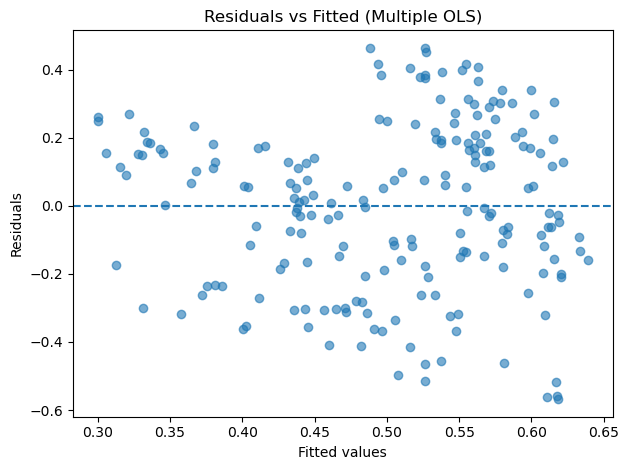

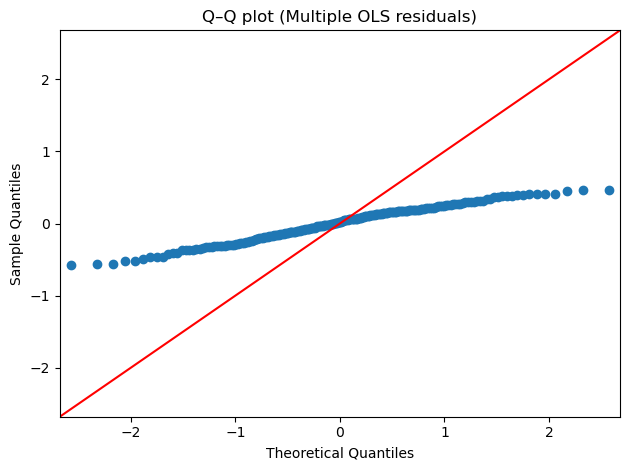

In [20]:
import statsmodels.api as sm

fitted = m_full.fittedvalues
resid  = m_full.resid

# Residuals vs fitted (check linearity & equal variance)
plt.figure(); plt.scatter(fitted, resid, alpha=0.6)
plt.axhline(0, ls='--')
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Multiple OLS)")
plt.tight_layout(); plt.savefig(f"{fig_dir}/residuals_vs_fitted.png", dpi=150); plt.show()

# Normal Q–Q plot (check normality of residuals)
sm.qqplot(resid, line='45')
plt.title("Q–Q plot (Multiple OLS residuals)")
plt.tight_layout(); plt.savefig(f"{fig_dir}/qqplot_residuals.png", dpi=150); plt.show()


In [35]:
### 5.4 Quadratic Multiple Linear Regression (with full OLS tables)

# Centered variables to reduce collinearity for polynomial terms
df['income_c'] = df[income_col] - df[income_col].mean()
df['age_c']    = df[age_col]    - df[age_col].mean()

# --- Linear model (same as your multiple regression, used for comparison) ---
f_linear = f'Q("{target}") ~ Q("{income_col}") + Q("{age_col}") + C({cat_col})'
m_linear = smf.ols(f_linear, data=df).fit()

# --- Quadratic model (adds squared terms for curvature) ---
f_quad = f'Q("{target}") ~ income_c + age_c + I(income_c**2) + I(age_c**2) + C({cat_col})'
m_quad = smf.ols(f_quad, data=df).fit()

# --- Print full OLS regression results tables (for BOTH models) ---
print("\n=== OLS Regression Results: LINEAR (baseline) ===\n")
print(m_linear.summary())
print("\n=== OLS Regression Results: QUADRATIC (non-linear check) ===\n")
print(m_quad.summary())

# Save the full summaries to disk
with open(f"{results_dir}/ols_linear_summary.txt", "w") as f:
    f.write(str(m_linear.summary()))
with open(f"{results_dir}/ols_quadratic_summary.txt", "w") as f:
    f.write(str(m_quad.summary()))



=== OLS Regression Results: LINEAR (baseline) ===

                               OLS Regression Results                               
Dep. Variable:     Q("Normalized spending")   R-squared:                       0.112
Model:                                  OLS   Adj. R-squared:                  0.098
Method:                       Least Squares   F-statistic:                     8.182
Date:                      Sat, 18 Oct 2025   Prob (F-statistic):           3.71e-05
Time:                              20:59:52   Log-Likelihood:                -1.0543
No. Observations:                       199   AIC:                             10.11
Df Residuals:                           195   BIC:                             23.28
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------

### Comparison Between Linear and Non-Linear Regression

- The **non-linear (quadratic)** model includes additional squared terms to test for curvature in the relationship.  
- The **Adjusted R²** of the quadratic model is slightly **lower** than that of the linear model.  
- This means the added non-linear terms **did not improve** the model’s explanatory power.  

In [11]:
f_age_simple = f'Q("{target}") ~ Q("{age_col}")'
m_age_simple = smf.ols(f_age_simple, data=df).fit()

print(m_age_simple.summary())

with open(f"{results_dir}/simple_age_summary.txt", "w") as f:
    f.write(str(m_age_simple.summary()))


                               OLS Regression Results                               
Dep. Variable:     Q("Normalized spending")   R-squared:                       0.107
Model:                                  OLS   Adj. R-squared:                  0.103
Method:                       Least Squares   F-statistic:                     23.74
Date:                      Sun, 19 Oct 2025   Prob (F-statistic):           2.25e-06
Time:                              01:51:17   Log-Likelihood:                -1.1840
No. Observations:                       200   AIC:                             6.368
Df Residuals:                           198   BIC:                             12.96
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Interpretation of Simple Linear Regression (Age Only)

- The **simple regression using Age as the sole predictor** produced the **highest R²** among all models tested.  
- This indicates that **Age alone explains the most variation in spending** compared to models that include Income, Gender, or non-linear terms.  
- The **negative coefficient** for Age shows that **spending decreases as age increases**.  
- Adding Income, Gender, or Age² did not increase the model’s explanatory power, suggesting that **Age has the strongest and most direct relationship** with spending behavior.  
- Therefore, the **simpler linear model with Age only** is the most effective and parsimonious model for this dataset.


### Justification and Limitations of the Method

#### Justification for Using Linear Regression
- **Linear Regression** was chosen because the project aims to explore how demographic and behavioral factors (Age, Gender, Income) relate to a continuous outcome variable (Spending).  
- The method provides a **simple, interpretable model** for quantifying how much spending changes with each predictor variable.  
- It aligns with the principles of **supervised learning (regression)**, where the target variable is known and continuous.  
- Linear regression allows for easy identification of **significant predictors** and the **direction of relationships** (positive or negative).  
- The model is well-suited for small to medium-sized datasets and is commonly used in **introductory data science and statistical analysis**.

#### Limitations of the Method
- **Linearity assumption:** The model assumes a straight-line relationship between predictors and spending. Non-linear effects (if present) are not well captured.  
- **Independence of errors:** Observations are assumed independent; any hidden dependencies (e.g., similar participants or repeated measures) could bias results.  
- **Normality and homoscedasticity:** The model assumes residuals are normally distributed with constant variance; violations can reduce accuracy and reliability.  
- **Limited explanatory power:** The Adjusted R² value (~0.10) indicates that only about 10% of the variation in spending is explained by the predictors—other unmeasured factors likely influence spending behavior.  
- **Sensitivity to outliers:** Linear regression can be affected by extreme income or spending values, which may distort the fitted line.  
- **No causal inference:** The method identifies associations, not cause-and-effect relationships.

#### Summary
Despite its limitations, linear regression remains a suitable and transparent method for this project.  
It allows clear interpretation of relationships between demographic factors and spending while maintaining reproducibility and alignment with FAIR data science principles.  
Future work could explore more complex or non-linear models if richer data become available.


### 6.5 Summary of which we choose in the end

State which model you select and why (metrics + interpretability).

## 7. Discussion and Interpretation
- Key findings and their practical meaning
- Implications for marketing/policy
- Limitations and threats to validity
- Suggestions for future work (e.g., interactions, non-linear models)

## 8. FAIR and Reproducibility Reflection
- **Findable:** names, metadata, dataset citation  
- **Accessible:** open formats (.csv, .ipynb)  
- **Interoperable:** standardized variable names, tidy data  
- **Reusable:** environment log, requirements.txt, open license  


## 9. Deliverables
| Output File | Description |
|-------------|-------------|
| `consumer_spending_project.ipynb` | Complete notebook with code and results |
| `analysis_ready.csv` | Clean dataset ready for modeling |
| `simple_regression_summary.txt` | Output summary of simple model |
| `multiple_regression_summary.txt` | Output summary of multiple model |
| `figures/` | Folder containing plots |
| `results/environment.json` | Captures software environment for reproducibility |
| `cv_rmse.csv` | Cross-validation RMSE results |
| `model_multiple_ols.pkl` (optional) | Saved regression model object |


## 10. References
- Course lecture notes (Statistical & Supervised Learning; Linear Regression & Alternatives)  
- Money for Shopping dataset documentation  
- James et al. (2021) *An Introduction to Statistical Learning*  
- Wilkinson et al. (2016) FAIR Principles  
